# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

## Importamos las librerías que vamos a utilizar

In [1]:
# pandas: Librería para manipulación y análisis de datos estructurados (DataFrames)
import pandas as pd

# numpy: Librería para cálculos numéricos y operaciones con arrays
import numpy as np

# matplotlib.pyplot: Librería básica para visualización de datos
import matplotlib.pyplot as plt

# seaborn: Librería avanzada de visualización estadística, construida sobre matplotlib
import seaborn as sns

## Leemos nuestro archivo de entrada `reviews_sentiment`

In [2]:
pd.set_option('max_colwidth', None)

In [3]:
df = pd.read_csv('data/reviews_sentiment.csv', sep=';')

In [4]:
df

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,"Hola desde hace algo más de un mes me pone sin conexión y no sale nada, antes me funcionaba correctamente.",23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas complicada de usar hay gente cambiandosevpor esevmotivo gracias,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393


Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

## Rápidas visualizaciones y análisis
Al menos realiza un análisis univariante y representa la distribución del rating. Realiza otras visualizaciones para ver la relación de tus datos.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [6]:
df.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


array([[<Axes: title={'center': 'wordcount'}>,
        <Axes: title={'center': 'Star Rating'}>],
       [<Axes: title={'center': 'sentimentValue'}>, <Axes: >]],
      dtype=object)

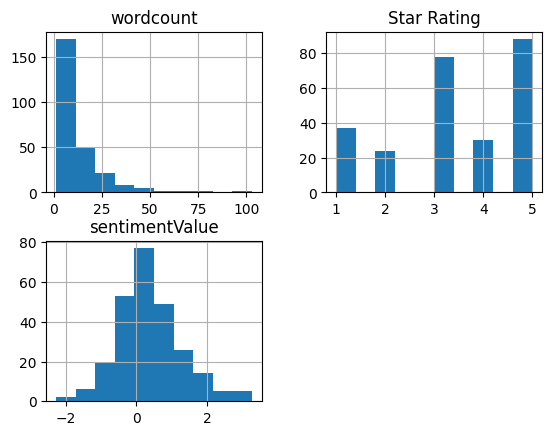

In [7]:
df.hist()

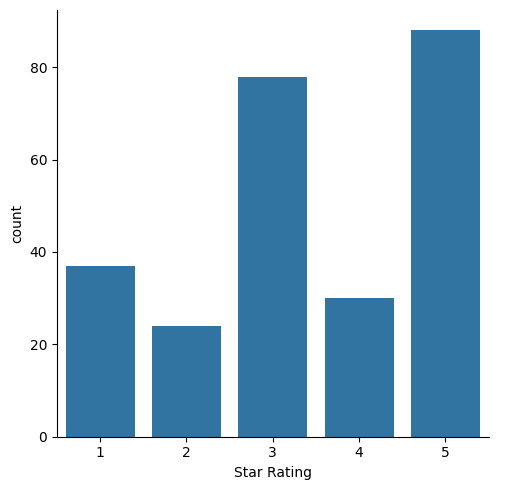

In [8]:

sns.catplot(x='Star Rating', data = df, kind= 'count')

In [9]:
df['Star Rating'].value_counts(normalize=True)

Star Rating
5    0.342412
3    0.303502
1    0.143969
4    0.116732
2    0.093385
Name: proportion, dtype: float64

<Axes: >

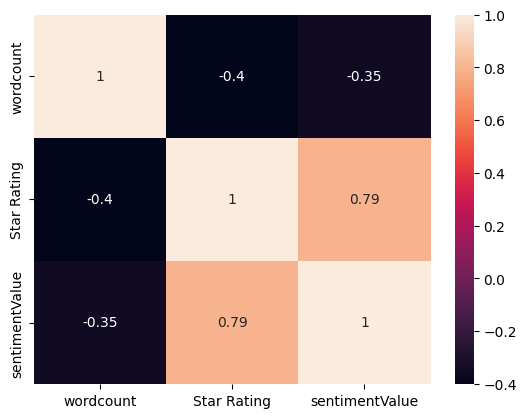

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True)  

## Preparamos el dataset
Divide en train/test y escala las features en el rango [0, 1].

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X= df[['wordcount', 'sentimentValue']] 
y = df['Star Rating']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Verificamos las dimensiones (filas, columnas) de cada conjunto
print(X_train.shape)  # (205, 2) - 205 ejemplos de entrenamiento, 2 features
print(X_test.shape)   # (52, 2) - 52 ejemplos de prueba, 2 features
print(y_train.shape)  # (205,) - 205 etiquetas de entrenamiento
print(y_test.shape)   # (52,) - 52 etiquetas de prueba

(205, 2)
(52, 2)
(205,)
(52,)


In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [16]:
scaler = MinMaxScaler() 
X_train_scal = scaler.fit_transform(X_train) 
X_test_scal= scaler.transform(X_test)

print(X_train_scal.min())
print(X_train_scal.max())

0.0
1.0


In [17]:
print(X_test_scal.min())
print(X_test_scal.max())

-0.0982228016602878
0.9325760278023711


In [18]:
scaler = StandardScaler() 
X_train_scal = scaler.fit_transform(X_train) 
X_test_scal= scaler.transform(X_test)

print(X_train_scal.mean())
print(X_train_scal.std())

print(X_test_scal.mean())
print(X_test_scal.std())

1.9496599456832016e-17
0.9999999999999999
0.00952085195612695
1.128192754031885


In [19]:
X_train

,wordcount,sentimentValue
75,4,-0.256112
178,8,0.647472
38,22,0.052841
136,34,0.214543
60,8,-0.108144
...,...,...
106,1,0.151900
14,14,-1.083269
92,4,0.020340
179,2,0.650792


In [20]:
X_train_scal

array([[-5.61337000e-01, -7.55392453e-01],
       [-2.49905105e-01,  2.84491919e-01],
       [ 8.40106524e-01, -3.99836374e-01],
       [ 1.77440221e+00, -2.13741698e-01],
       [-2.49905105e-01, -5.85104354e-01],
       [-4.05621052e-01,  1.10710505e+00],
       [-1.72047132e-01,  4.53365512e-01],
       [ 2.17242736e-01,  9.80295899e-01],
       [-2.49905105e-01,  7.30380558e-01],
       [ 8.40106524e-01, -1.46477082e-01],
       [-7.94910920e-01, -6.21605750e-01],
       [ 1.46297031e+00,  5.41635339e-01],
       [-6.39194973e-01, -4.11888028e-01],
       [-4.05621052e-01,  7.17236241e-02],
       [ 6.15267889e-02,  1.17089171e-01],
       [-1.72047132e-01,  1.16632816e+00],
       [ 3.72958683e-01, -2.41970031e-01],
       [ 2.94227181e+00, -2.93082320e-01],
       [ 6.15267889e-02, -2.29099308e-01],
       [-1.63311847e-02, -1.79021396e-01],
       [ 8.40106524e-01, -1.05699662e-01],
       [ 2.94227181e+00, -1.99613815e-01],
       [-7.94910920e-01, -6.58248622e-01],
       [-4.

## Creamos el Modelo
Entrena con un KNN y evalúa el error en train y en test

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier() 
knn.fit(X_train_scal,y_train) 

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## Evalúa tu modelo

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, multilabel_confusion_matrix, classification_report

In [24]:
y_pred=knn.predict(X_test_scal)
print('accuracy_score', accuracy_score(y_test,y_pred)) 
print('confusion\n' , confusion_matrix(y_test,y_pred))

accuracy_score 0.8653846153846154
confusion
 [[ 9  1  0  0  0]
 [ 0  2  0  0  0]
 [ 2  1 11  0  0]
 [ 0  1  1  5  0]
 [ 0  0  1  0 18]]


In [25]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[40,  2],
        [ 1,  9]],

       [[47,  3],
        [ 0,  2]],

       [[36,  2],
        [ 3, 11]],

       [[45,  0],
        [ 2,  5]],

       [[33,  0],
        [ 1, 18]]])

In [26]:
# Para cada clase, la matriz 2x2 es:
#                Predicho NO    Predicho SÍ
# Real NO       [[    TN    ,      FP     ],
# Real SÍ        [    FN    ,      TP     ]]

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.40      1.00      0.57         2
           3       0.85      0.79      0.81        14
           4       1.00      0.71      0.83         7
           5       1.00      0.95      0.97        19

    accuracy                           0.87        52
   macro avg       0.81      0.87      0.81        52
weighted avg       0.90      0.87      0.87        52



In [28]:
knn.predict(scaler.transform([[10, 3], [3, -2]]))

c:\Users\borja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([5, 1])

## ¿Cómo obtener el mejor valor de k? Crea y evalúa nuevos modelos
¿Qué valor de k maximiza el accuracy? Representa todas las iteraciones en un scatterplot -> k vs accuracy

In [29]:
k_range=range(1,30)

scores=[] 
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scal, y_train)
    scores.append(knn.score(X_test_scal,y_test))

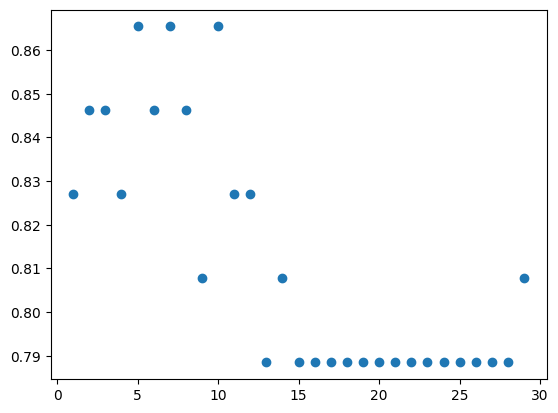

In [30]:
plt.scatter(k_range,scores)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV  

In [ ]:
pipe = Pipeline(steps=(
    ('scaler', MinMaxScaler()),           
    ('classifier', KNeighborsClassifier()) 
))


In [36]:
params ={
    'scaler': [MinMaxScaler(), StandardScaler(), None],
    'classifier__n_neighbors': np.arange(2, 15),
    'classifier__weights': ['uniform', 'distance']
    
}

In [37]:
gs_pipe = GridSearchCV(
    pipe,
    params,
    cv=5,
    scoring='accuracy',
    verbose=2,
    
)

gs_pipe.fit(X_train, y_train)

print(gs_pipe.best_estimator_)  # El mejor pipeline completo (scaler + classifier)
print(gs_pipe.best_params_)     # Los mejores hiperparámetros encontrados
print(gs_pipe.best_score_)      # El mejor accuracy obtenido en validación cruzada


Fitting 5 folds for each of 78 candidates, totalling 390 fits
[CV] END classifier__n_neighbors=2, classifier__weights=uniform, scaler=MinMaxScaler(); total time=   0.0s
[CV] END classifier__n_neighbors=2, classifier__weights=uniform, scaler=MinMaxScaler(); total time=   0.0s
[CV] END classifier__n_neighbors=2, classifier__weights=uniform, scaler=MinMaxScaler(); total time=   0.0s
[CV] END classifier__n_neighbors=2, classifier__weights=uniform, scaler=MinMaxScaler(); total time=   0.0s
[CV] END classifier__n_neighbors=2, classifier__weights=uniform, scaler=MinMaxScaler(); total time=   0.0s
[CV] END classifier__n_neighbors=2, classifier__weights=uniform, scaler=StandardScaler(); total time=   0.0s
[CV] END classifier__n_neighbors=2, classifier__weights=uniform, scaler=StandardScaler(); total time=   0.0s
[CV] END classifier__n_neighbors=2, classifier__weights=uniform, scaler=StandardScaler(); total time=   0.0s
[CV] END classifier__n_neighbors=2, classifier__weights=uniform, scaler=Stan

In [38]:
h_model = gs_pipe.best_estimator_

In [39]:
h_model

,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,n_neighbors,np.int64(7)
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [40]:
h_model.fit(X_train, y_train)
y_pred = h_model.predict(X_test)
print("accuracy_score", accuracy_score(y_test, y_pred))

accuracy_score 0.8269230769230769


In [41]:
h_model['scaler']

,feature_range,"(0, ...)"
,copy,True
,clip,False


## Predice con nuevos datos.
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1

In [42]:
h_model.predict([[5, 1]])

c:\Users\borja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([5])